In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/tarushi/Desktop/data.CSV")

d_cpy=data

/home/tarushi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
d_cpy.head()

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30 00:00:00,1
1,23631,100,14144,177 Cross Rd,2013-06-30 00:00:00,1
2,23632,100,14132,175 Cross Rd,2013-06-30 00:00:00,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30 00:00:00,2
4,23633,100,14147,178 Cross Rd,2013-06-30 00:00:00,1


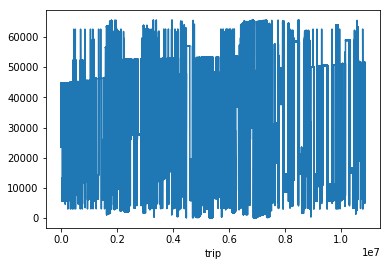

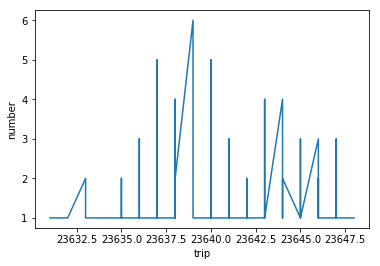

In [4]:
#Trip ID vs Number of Boardings

no=d_cpy['NumberOfBoardings']
trip=d_cpy['TripID']
stop=d_cpy['StopID']
stop_z=stop[:100]
no_zoom=no[:100]
trip_zoom=trip[:100]
plt.figure()
plt.plot(trip)
plt.xlabel('trip')
#plt.ylabel('number')
plt.show()
plt.plot(trip_zoom,no_zoom)
plt.xlabel('trip')
plt.ylabel('number')
plt.show()

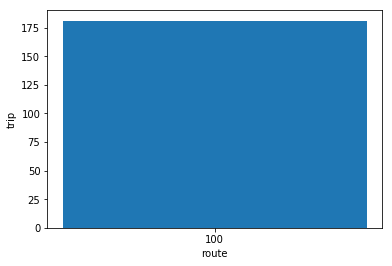

In [5]:
#RouteId vs Number
route=d_cpy['RouteID']
route_zoom=route[:50000]
no_zoom=no[:50000]
plt.figure()
plt.bar(route_zoom,no_zoom)
plt.xlabel('route')
plt.ylabel('trip')
plt.show()

<IPython.core.display.Javascript object>


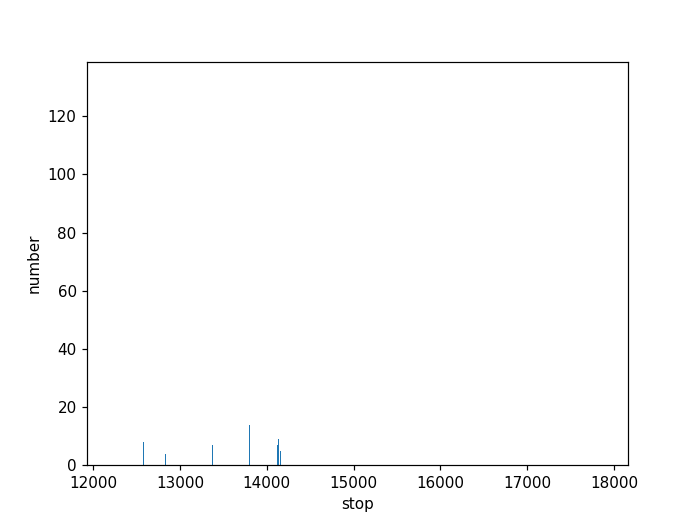

In [6]:
#StopId vs Number 
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
stop=d_cpy['StopID']
stop_zoom=stop[:1000]
no_zoom=no[:1000]
plt.figure()
plt.bar(stop_zoom,no_zoom)
plt.xlabel('stop')
plt.ylabel('number')
plt.show()

<IPython.core.display.Javascript object>


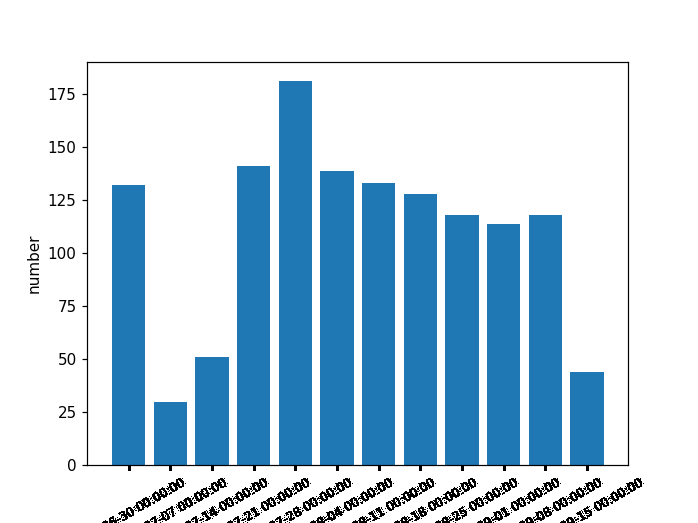

In [7]:
week=d_cpy['WeekBeginning']
week_zoom=week[:20000]
no_zoom=no[:20000]
plt.figure()
plt.bar(week_zoom,no_zoom)
plt.xticks(week_zoom,fontsize=8, rotation=30)
plt.xlabel('week')
plt.ylabel('number')
plt.show()

In [8]:
d_cpy.drop(['TripID', 'StopName'], axis=1, inplace=True)

In [9]:
d_cpy.head()

,RouteID,StopID,WeekBeginning,NumberOfBoardings
0,100,14156,2013-06-30 00:00:00,1
1,100,14144,2013-06-30 00:00:00,1
2,100,14132,2013-06-30 00:00:00,1
3,100,12266,2013-06-30 00:00:00,2
4,100,14147,2013-06-30 00:00:00,1


In [10]:
#from sklearn.preprocessing
x=d_cpy.groupby(['StopID']).sum()
y=d_cpy.groupby(['WeekBeginning']).sum()
y.drop(['StopID'],axis=1,inplace=True)


In [11]:
x.head()

,NumberOfBoardings
StopID,
10001,641
10002,64
10003,455
10004,66
10005,25


In [12]:
y.head()
import datetime
import random

In [13]:
def time():
        hrs = [random.randrange(0, 24, 1) for _ in range(900000)]
        m = [random.randrange(0,59 , 1) for _ in range(900000)]
        sec = [random.randrange(0, 59, 1) for _ in range(900000)]
        """hrs=random.randint(0,23)
        m=random.randint(0,59)
        sec=random.randint(0,59)"""
        t=[]
        for i in range(0,900000):
            t.append(datetime.time(hrs[i],m[i], sec[i]))
        
        return t


In [14]:
data_new=pd.DataFrame(columns=['Week Beginning','RouteID','StopID','Timeatrec','NumberOfBoardings'])
data_new['Week Beginning']=d_cpy['WeekBeginning'][:900000]
data_new['RouteID']=d_cpy['RouteID'][:900000]
data_new['StopID']=d_cpy['StopID'][:900000]
data_new['NumberOfBoardings']=d_cpy['NumberOfBoardings'][:900000]
data_new['Timeatrec']=time()
"""#for i in range(0,len(d_cpy),900000):
    if(len(data_new)!=1000000):
        data_new['Week Beginning']=d_cpy['WeekBeginning'][i:i+900000]
        data_new['RouteId']=d_cpy['RouteID'][i:i+900000]
        data_new['StopID']=d_cpy['StopID'][i:i+900000]
        data_new['NumberOfBoardings']=d_cpy['NumberOfBoardings'][i:i+900000]
        data_new['timeatrec']=time
    else:
        break"""

data_new.head()

,Week Beginning,RouteID,StopID,Timeatrec,NumberOfBoardings
0,2013-06-30 00:00:00,100,14156,13:50:45,1
1,2013-06-30 00:00:00,100,14144,19:50:07,1
2,2013-06-30 00:00:00,100,14132,01:45:55,1
3,2013-06-30 00:00:00,100,12266,13:57:41,2
4,2013-06-30 00:00:00,100,14147,05:49:08,1


In [62]:
timerec=data_new['Timeatrec'][:900]
k=data_new.groupby('Timeatrec').sum()
k.head()


,StopID,NumberOfBoardings
Timeatrec,,
00:00:00,83616,33
00:00:01,200180,52
00:00:02,142111,85
00:00:03,182896,71
00:00:04,186551,63


<IPython.core.display.Javascript object>


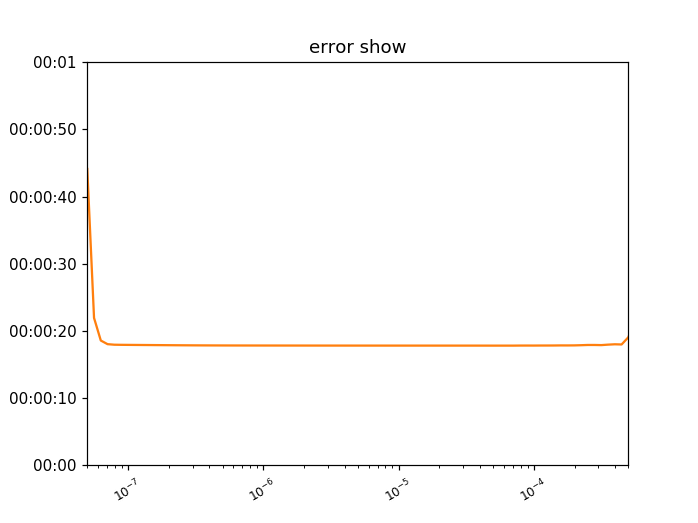

In [56]:
plt.figure()
plt.plot(timerec[400:800])
plt.xticks(fontsize=8, rotation=30)
plt.show()


<IPython.core.display.Javascript object>


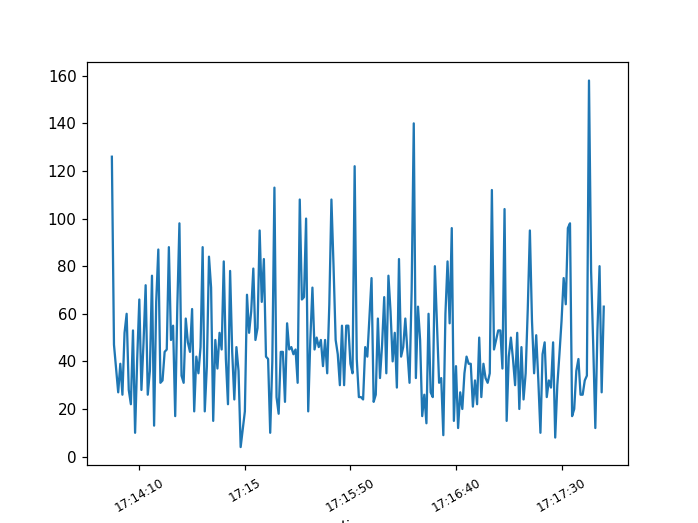

In [41]:
plt.figure()
plt.plot(k['NumberOfBoardings'][60000:60230])
plt.xticks(fontsize=8, rotation=30)
plt.show()

In [65]:
#ROUTE VS BOARDING
route=data_new['RouteID']

r=route.groupby('100').sum()
r.head()
route.T.head()

0    100
1    100
2    100
3    100
4    100
Name: RouteID, dtype: object

In [67]:
#plt.figure()
#plt.plot(route[:100000])
#plt.show()

In [116]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

<IPython.core.display.Javascript object>


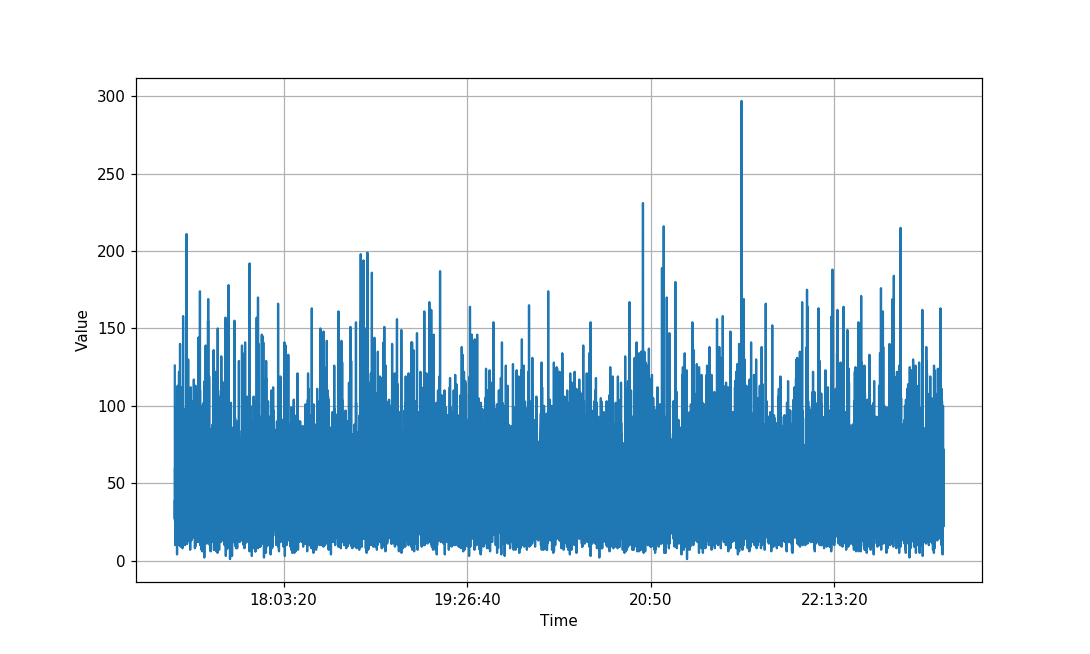

In [117]:
#LSTM FOR TIME AND NUMBER OF BOARDING
boarding=k['NumberOfBoardings'][60000:80230]
time_step=data_new['Timeatrec'][60000:80230]
series = np.array(boarding)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plt.plot(boarding)
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [128]:
split_time = 14161
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 64
shuffle_buffer_size = 7000

In [119]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [120]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [96]:
!pip install tensorflow==2.0.0b1

In [97]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [129]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#window_size = 64
#batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)



<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.int64, tf.int64)>
(14161,)


In [130]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])



In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-2 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


In [132]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([5e-8, 5e-4, 0, 60])
plt.title('error show')

Text(0.5, 1.0, 'error show')